#  Highest valued startups exploratory data anaysis

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("/content/Startups.csv")


## View of Data

In [45]:
data.head()

,Company,Valuation,Valuation_date,Industry,Country
0,ByteDance,140.0,April-21,Internet,China
1,SpaceX,100.0,October-21,Aerospace,United States
2,Stripe,95.0,March-21,Financial services,United States / Ireland
3,Klarna,45.6,June-21,Fintech,Sweden
4,Canva,40.0,September-21,Graphic design,Australia


In [46]:
data.describe()

,Valuation
count,250.000000
mean,7.820840
std,13.465775
min,2.100000
25%,3.000000
50%,4.025000
75%,7.400000
max,140.000000


## Clean data


### Check columns for Null values

In [49]:
data.isna().sum()

Company           0
Valuation         0
Valuation_date    0
Industry          0
Country           0
dtype: int64

#### Replace Industrys Null values with Other

In [50]:
data["Industry"].fillna("Other", inplace = True)

### Remove any unwated whitespace or characters

In [51]:
data.Country.unique()

array(['\xa0China', '\xa0United States',
       '\xa0United States\xa0/\xa0\xa0Ireland', '\xa0Sweden',
       '\xa0Australia', '\xa0United Kingdom', '\xa0Brazil',
       '\xa0United Kingdom\xa0/\xa0\xa0UAE', '\xa0Bahamas', '\xa0India',
       '\xa0South Korea', '\xa0Turkey', '\xa0China\xa0/\xa0\xa0Hong Kong',
       '\xa0Germany', '\xa0Hong Kong\xa0/\xa0\xa0China',
       '\xa0Portugal\xa0/\xa0\xa0United States', '\xa0Mexico',
       '\xa0Indonesia', '\xa0Canada', '\xa0Netherlands', '\xa0Israel',
       '\xa0India\xa0/\xa0\xa0United States',
       '\xa0Australia\xa0/\xa0\xa0Hong Kong',
       '\xa0China\xa0/\xa0\xa0United States', '\xa0Colombia',
       '\xa0United Kingdom\xa0/\xa0\xa0United States', '\xa0Belgium',
       '\xa0Estonia', '\xa0France\xa0/\xa0\xa0United States',
       '\xa0Lithuania', '\xa0France', '\xa0Austria',
       '\xa0Israel\xa0/\xa0\xa0United States', '\xa0Japan',
       '\xa0Argentina', '\xa0\xa0United States', '\xa0\xa0Vietnam',
       '\xa0\xa0China', '\xa0\x

In [52]:
data.Country =[col.strip('\xa0') for col in data.Country]

In [53]:
data.Country =[col.replace('\xa0/\xa0\xa0\xa0', '/') for col in data.Country]

In [54]:
data.Country =[col.replace('\xa0/\xa0\xa0', '/') for col in data.Country]

In [55]:
data.Country.unique()

array(['China', 'United States', 'United States/Ireland', 'Sweden',
       'Australia', 'United Kingdom', 'Brazil', 'United Kingdom/UAE',
       'Bahamas', 'India', 'South Korea', 'Turkey', 'China/Hong Kong',
       'Germany', 'Hong Kong/China', 'Portugal/United States', 'Mexico',
       'Indonesia', 'Canada', 'Netherlands', 'Israel',
       'India/United States', 'Australia/Hong Kong',
       'China/United States', 'Colombia', 'United Kingdom/United States',
       'Belgium', 'Estonia', 'France/United States', 'Lithuania',
       'France', 'Austria', 'Israel/United States', 'Japan', 'Argentina',
       'Vietnam', 'Brazil/United States'], dtype=object)

## The 10 highest valued companys

In [56]:
data.sort_values('Valuation', ascending=False).head(10)

,Company,Valuation,Valuation_date,Industry,Country
0,ByteDance,140.0,April-21,Internet,China
1,SpaceX,100.0,October-21,Aerospace,United States
2,Stripe,95.0,March-21,Financial services,United States/Ireland
3,Klarna,45.6,June-21,Fintech,Sweden
4,Canva,40.0,September-21,Graphic design,Australia
5,Instacart,39.0,March-21,Retail,United States
6,Databricks,38.0,August-21,Software,United States
7,Revolut,33.0,July-21,Fintech,United Kingdom
8,Nubank,30.0,June-21,Financial services,Brazil
9,Telegram,30.0,January-21,Internet,United Kingdom/UAE


## 5 Most common industry sectors


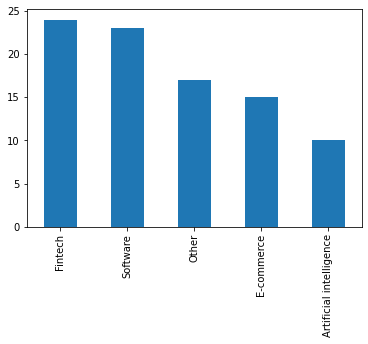

In [57]:
industryCount = pd.value_counts(data['Industry'].values, sort=True).head(5)
industryCount.plot.bar()

### Total valuation by each industry

In [89]:
industryVal = pd.DataFrame(data.groupby("Industry").sum()).sort_values("Valuation",ascending=False)[:5].reset_index()


,Industry,Valuation
0,Fintech,180.97
1,Financial services,173.90
2,Internet,173.00
3,Software,161.81
4,E-commerce,125.74


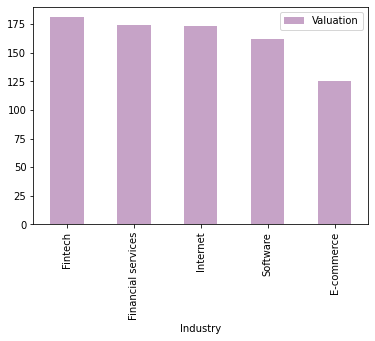

In [99]:
industryVal.plot.bar(x='Industry', y='Valuation', color ='#C6A3C7')

#### Top Fintech companies

In [59]:
data.loc[data['Industry'] == 'Fintech'].head(5)

,Company,Valuation,Valuation_date,Industry,Country
3,Klarna,45.6,June-21,Fintech,Sweden
7,Revolut,33.0,July-21,Fintech,United Kingdom
19,Checkout.com,15.0,January-21,Fintech,United Kingdom
50,Rapyd,8.7,August-21,Fintech,United Kingdom
61,Razorpay,7.5,December-21,Fintech,India


### Top 5 country

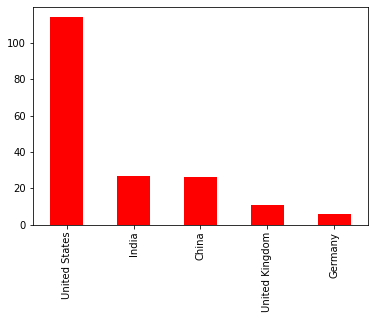

In [76]:
countryCount = pd.value_counts(data['Country'].values, sort=True).head(5)
countryCount.plot.bar(color="red")

## Total valuation for each country

In [61]:
topCountryVal = pd.DataFrame(data.groupby("Country").sum()).sort_values("Valuation",ascending=False)[:5].reset_index()
topCountryVal

,Country,Valuation
0,United States,806.17
1,China,315.29
2,India,130.00
3,United States/Ireland,95.00
4,United Kingdom,94.25


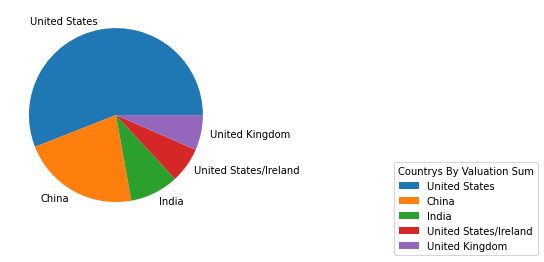

In [75]:
y = topCountryVal.Valuation
mylabels = topCountryVal.Country

plt.pie(y, labels = mylabels)
plt.legend(title = "Countrys By Valuation Sum", bbox_to_anchor=(1.5,0), loc="lower right", bbox_transform=plt.gcf().transFigure)
plt.show()

## Mean value of the top 15 countries

In [65]:
countryMean = pd.DataFrame(data.groupby("Country").mean()).sort_values("Valuation",ascending=False)[:15].reset_index()
countryMean

,Country,Valuation
0,United States/Ireland,95.000000
1,United Kingdom/UAE,30.000000
2,Sweden,28.675000
3,Bahamas,25.000000
4,Australia,21.100000
5,Brazil,12.333333
6,China,12.126538
7,Turkey,12.030000
8,China/Hong Kong,12.000000
9,Hong Kong/China,10.000000


## United states company valuations

In [66]:
data.loc[data['Country'] == 'United States'].head()

,Company,Valuation,Valuation_date,Industry,Country
1,SpaceX,100.0,October-21,Aerospace,United States
5,Instacart,39.0,March-21,Retail,United States
6,Databricks,38.0,August-21,Software,United States
10,Epic Games,28.7,April-21,Video games,United States
11,Chime,25.0,August-21,Financial services,United States


## United States/Ireland company valuations

In [67]:
data.loc[data['Country'] == 'United States/Ireland']

,Company,Valuation,Valuation_date,Industry,Country
2,Stripe,95.0,March-21,Financial services,United States/Ireland


## Percentage of total valuations by country

In [70]:
CountryPerct = data['Country'].value_counts(normalize=True)*100

CountryPerct.head()

United States     45.6
India             10.8
China             10.4
United Kingdom     4.4
Germany            2.4
Name: Country, dtype: float64

## Most common dates start ups were valued

In [95]:
topDates = data.Valuation_date.value_counts().nlargest(10)

June-21         31
August-21       29
July-21         19
September-21    18
October-21      18
May-21          17
April-21        14
November-21     14
March-21        11
January-21       9
Name: Valuation_date, dtype: int64

Text(0, 0.5, 'Count')

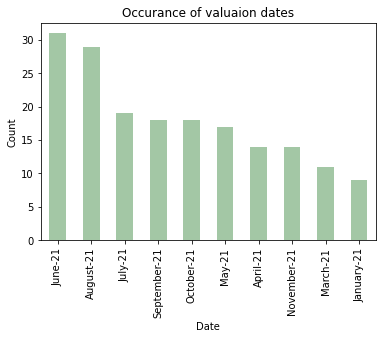

In [74]:
topDatesBar = topDates.plot.bar(title ="Occurance of valuaion dates" , color='#A3C7A5')
topDatesBar.set_xlabel("Date")
topDatesBar.set_ylabel("Count")

# Summary

*   The hightest valued start up is ByteDance from China
*   At 45.6% The United States has the highest total of all start ups produced by each country
*   The mean of startup valuation coming out of United States is slightly less that the mean for all Start ups in the the data set.
*   United States/Ireland	 have the highest mean however it only has one entery.
*   Fintech is the most common start up industy and has the highest total valuations. Klarna from the country Sweden is the highest valued Fintech start up
*   June-21 is the most popular date for valuation followed closely by August-21


